In [1]:
import pandas
import seaborn


## For each algorithm 
1. Load output data
2. Trosform to a feature matrix (by sample)
3. merge all features in one df

### Load Clinical data

In [2]:
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
# display(clinical)
# display(clinical.loc[:,['FileName','Groups','Patients']])
Annot = clinical.loc[:,['FileName','Groups','Patients']].drop_duplicates()
Annot.index = Annot['FileName']

display(Annot)

,FileName,Groups,Patients
FileName,,,
reg001,reg001,1,1
reg002,reg002,1,1
reg006,reg006,1,2
reg035,reg035,1,9
reg036,reg036,1,9
...,...,...,...
reg005,reg005,1,2
reg018,reg018,1,5
reg027,reg027,4,7


### HMRF (giotto)

,cell_ID,class,FileName,Patients,cell_type
53434,42634.0,6,reg033,8,macrophages (M1>M2)


FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
class,,,,,,,,,,,,,,,,,,,,,
5,117.0,74.0,105.0,68.0,0.0,0.0,7.0,0.0,345.0,226.0,...,0.0,0.0,0.0,11.0,0.0,0.0,2981.0,2023.0,8.0,2.0


,FileName,Groups,Patients
FileName,,,
reg001,"(0.6449826989619377, 0.03206459054209919, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.7633986928104575, 0.1633986928104575, 0.292..."
reg002,"(0.6788158400615149, 0.06958861976163014, 0.27...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.7633986928104575, 0.1633986928104575, 0.292..."
reg006,"(0.7041906958861976, 0.09773164167627835, 0.27...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.8758169934640523, 0.3045751633986928, 0.294..."
reg035,"(0.7380238369857748, 0.1352556708958093, 0.286...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26..."
reg036,"(0.7718569780853518, 0.17277970011534027, 0.29...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.9568627450980393, 0.42745098039215684, 0.26..."
...,...,...,...
reg005,"(0.24682814302191466, 0.4675893886966551, 0.71...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.8758169934640523, 0.3045751633986928, 0.294..."
reg018,"(0.27389465590157636, 0.4325259515570934, 0.69...","(0.9568627450980393, 0.42745098039215684, 0.26...","(0.26405228758169935, 0.6091503267973857, 0.70..."
reg027,"(0.300961168781238, 0.3974625144175317, 0.6768...","(0.4, 0.7607843137254902, 0.6470588235294118)","(0.25359477124183005, 0.45882352941176474, 0.7..."


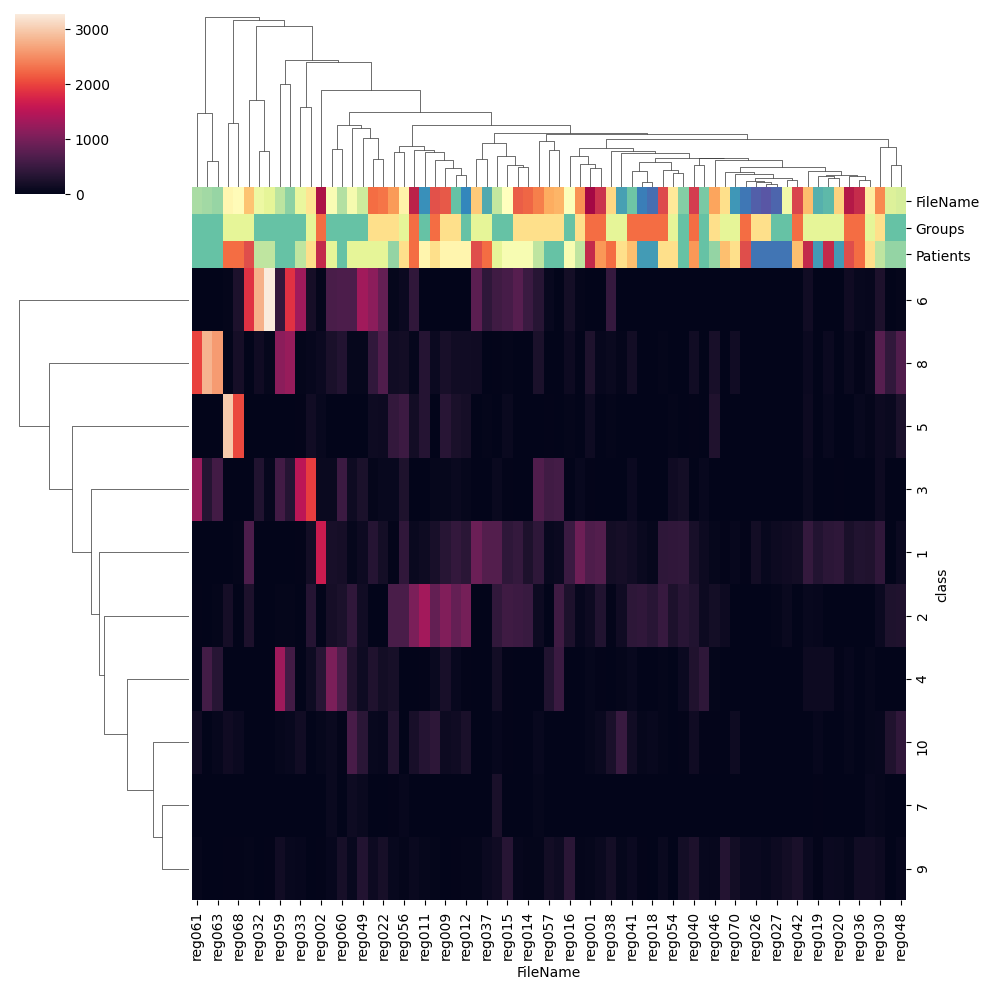

In [3]:
hmrf_df = pandas.read_csv('~/Downloads/hrmf_.csv', index_col=0)

display(hmrf_df.sample())
hmrf = hmrf_df.loc[:,['FileName','class']]
hmrf_count = pandas.DataFrame(hmrf.value_counts().reset_index())
hmrf_count = hmrf_count.pivot_table(index='class', columns='FileName', values = 'count').fillna(0)
display(hmrf_count.sample())


row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(row_colors)


seaborn.clustermap(hmrf_count.fillna(0), col_colors=row_colors)

In [4]:
hmrf_count.columns
hmrf_count.index = "HMRF_Niche_" + hmrf_count.index.astype(str)
hmrf_count.head()

FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
class,,,,,,,,,,,,,,,,,,,,,
HMRF_Niche_1,666.0,1636.0,449.0,376.0,14.0,225.0,651.0,902.0,334.0,440.0,...,0.0,0.0,0.0,11.0,430.0,107.0,0.0,33.0,189.0,53.0
HMRF_Niche_2,104.0,6.0,73.0,0.0,0.0,0.0,248.0,0.0,1061.0,845.0,...,24.0,0.0,34.0,30.0,355.0,114.0,183.0,0.0,137.0,0.0
HMRF_Niche_3,16.0,79.0,78.0,0.0,0.0,7.0,0.0,0.0,39.0,87.0,...,1238.0,312.0,569.0,320.0,175.0,64.0,0.0,0.0,0.0,3.0
HMRF_Niche_4,45.0,334.0,108.0,105.0,0.0,53.0,0.0,0.0,213.0,67.0,...,7.0,575.0,338.0,563.0,90.0,407.0,0.0,0.0,28.0,0.0
HMRF_Niche_5,117.0,74.0,105.0,68.0,0.0,0.0,7.0,0.0,345.0,226.0,...,0.0,0.0,0.0,11.0,0.0,0.0,2981.0,2023.0,8.0,2.0


### Stagate

,x,y,Louvain,cell_types,Count,FileName,Patients,Groups,x_offset,y_offset
0,335165,979,12,B cells,0,reg001,1,1,335000,0.0
1,335219,859,2,B cells,1,reg001,1,1,335000,0.0
2,335328,1105,10,B cells,2,reg001,1,1,335000,0.0
3,335422,120,2,B cells,3,reg001,1,1,335000,0.0
4,335415,870,2,B cells,4,reg001,1,1,335000,0.0


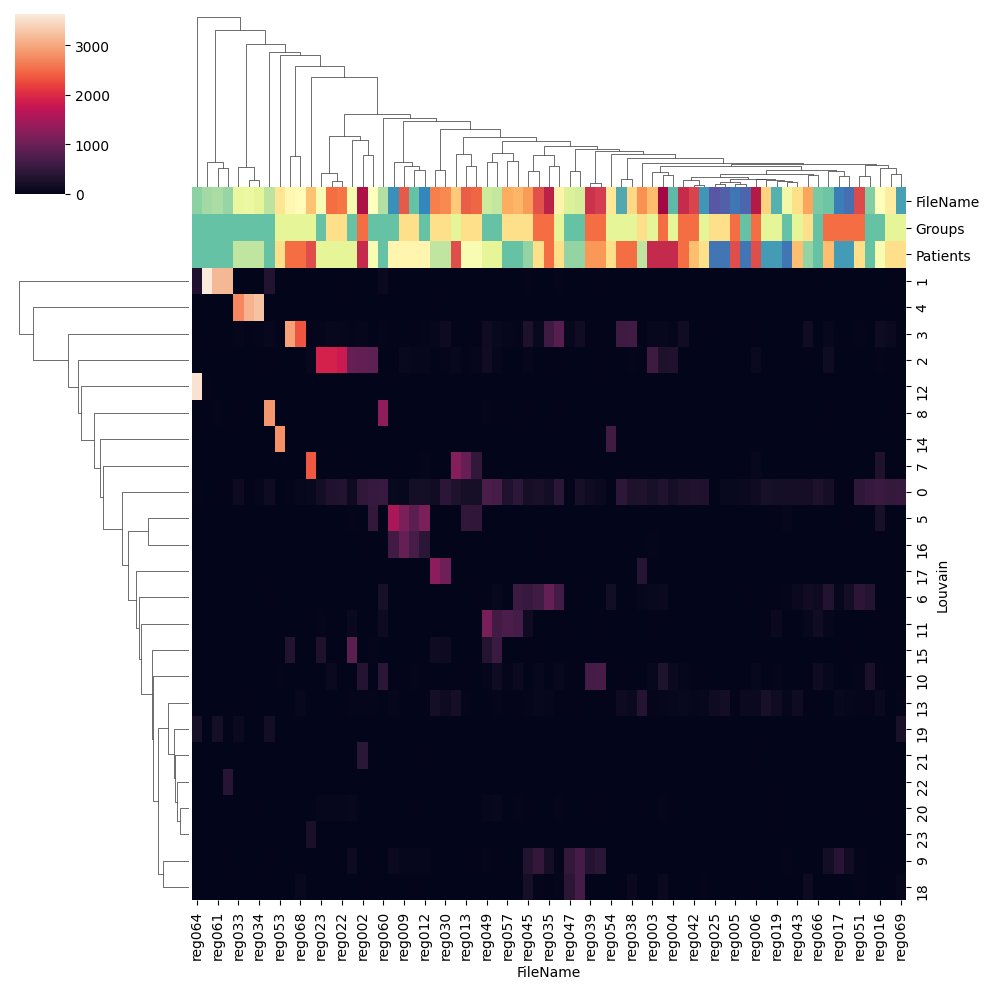

In [5]:
stagate_df = pandas.read_csv('~/Data/CODEX_CTCL/stitched_samples_Lovain_Phillips_Stagate.csv', index_col=0)
display(stagate_df.head())
stagate = stagate_df.loc[:,['FileName','Louvain']]
stagate_count = pandas.DataFrame(stagate.value_counts().reset_index())
stagate_count = stagate_count.pivot_table(index='Louvain', columns='FileName', values = 'count').fillna(0)
stagate_count.sample()
seaborn.clustermap(stagate_count.fillna(0), col_colors=row_colors)

In [6]:
stagate_count.index = "Stagete_Niche" + stagate_count.index.astype(str)
stagate_count.head()


FileName,reg001,reg002,reg003,reg004,reg005,reg006,reg007,reg008,reg009,reg010,...,reg061,reg062,reg063,reg064,reg065,reg066,reg067,reg068,reg069,reg070
Louvain,,,,,,,,,,,,,,,,,,,,,
Stagete_Niche0,322.0,481.0,231.0,207.0,83.0,155.0,79.0,287.0,63.0,193.0,...,18.0,1.0,24.0,33.0,536.0,283.0,35.0,70.0,537.0,301.0
Stagete_Niche1,7.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,7.0,...,3158.0,3628.0,3138.0,305.0,3.0,18.0,4.0,10.0,3.0,3.0
Stagete_Niche2,282.0,915.0,590.0,307.0,0.0,108.0,62.0,63.0,80.0,44.0,...,1.0,0.0,1.0,0.0,0.0,1.0,7.0,4.0,1.0,2.0
Stagete_Niche3,69.0,48.0,59.0,33.0,0.0,23.0,30.0,19.0,7.0,21.0,...,26.0,9.0,12.0,27.0,9.0,1.0,2946.0,2329.0,3.0,26.0
Stagete_Niche4,1.0,2.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Proportions

In [7]:
prop_df = pandas.read_csv("../../../Data/CODEX_CTCL/CODEX_count_types_per_sample.csv")
prop_df.sample()

,FileName,Groups,B cells,CD4+ T cells,CD8+ T cells,CLA+ leukocytes,"DCs, CD11c+",IDO+ stromal cells,Langerhans cells,Tregs,...,macrophages (M1>M2),macrophages (M2>M1),mast cells,nerves,neutrophils,plasma cells,stroma,tumor cells,"tumor cells, intraepithelial",vasculature
16,reg031,2,2,4,4,0,0,0,1,1,...,15,208,0,2,1,10,321,343,0,101


(29, 23)


,FileName,Groups
FileName,,
reg001,reg001,1
reg002,reg002,1
reg005,reg005,1
reg006,reg006,1
reg009,reg009,2
reg010,reg010,2
reg013,reg013,2
reg014,reg014,2
reg017,reg017,1


,Groups,B cells,CD4+ T cells,CD8+ T cells,CLA+ leukocytes,"DCs, CD11c+",IDO+ stromal cells,Langerhans cells,Tregs,epithelium,...,macrophages (M1>M2),macrophages (M2>M1),mast cells,nerves,neutrophils,plasma cells,stroma,tumor cells,"tumor cells, intraepithelial",vasculature
FileName,,,,,,,,,,,,,,,,,,,,,
reg001,1,23,16,107,12,0,0,22,102,90,...,177,20,2,8,24,53,219,214,22,64
reg002,1,11,34,122,8,0,0,20,248,22,...,368,63,7,25,12,80,363,563,26,85
reg005,1,0,0,0,0,0,0,0,0,2,...,4,6,1,0,0,0,47,4,0,44
reg006,1,6,3,5,3,0,0,12,15,4,...,67,58,2,6,1,4,156,151,2,51
reg009,2,2,109,114,4,0,1,78,53,973,...,247,20,11,3,0,4,141,286,169,28
reg010,2,0,99,72,10,0,1,52,46,786,...,150,19,22,14,0,0,187,260,105,58
reg013,2,153,15,28,0,0,0,6,5,468,...,107,4,6,7,0,3,224,569,2,112
reg014,2,25,5,17,0,0,0,10,4,433,...,95,6,6,2,0,1,132,418,3,74
reg017,1,0,0,1,0,0,0,3,4,508,...,11,2,1,1,0,0,11,5,1,9


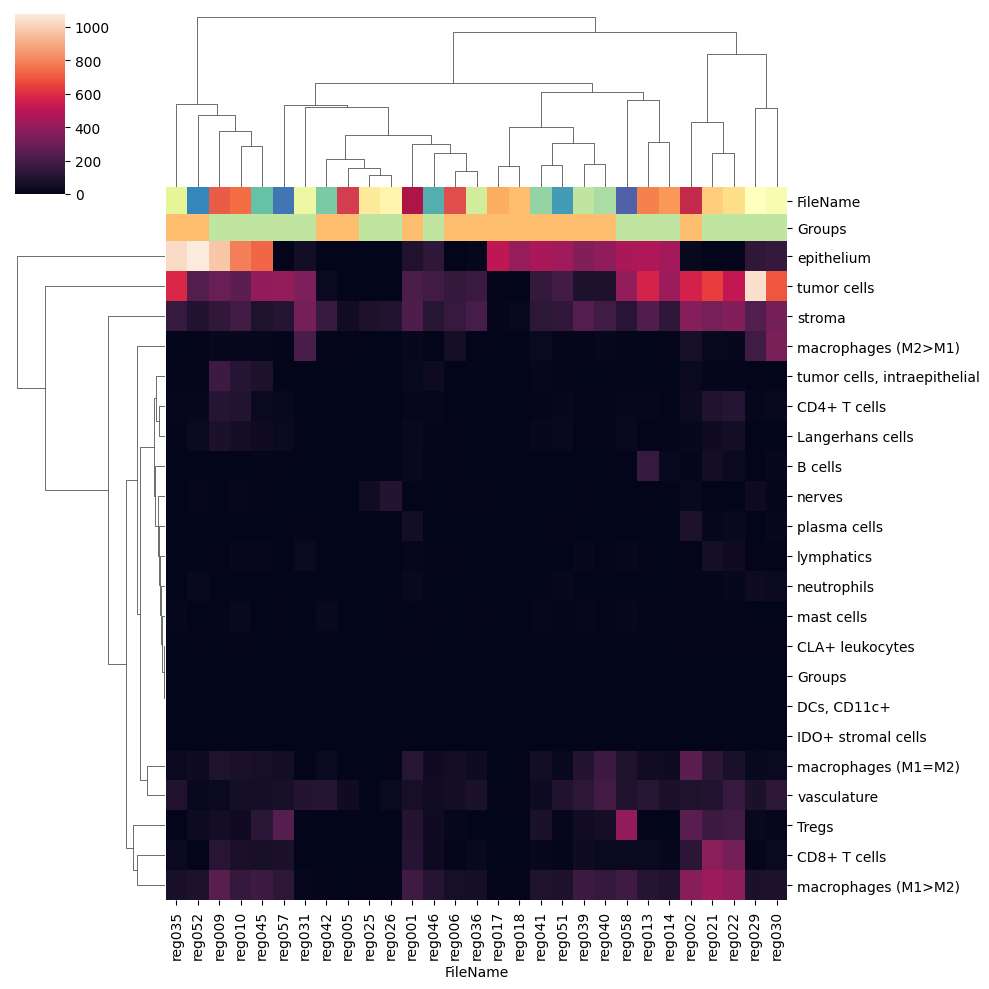

In [8]:

prop_df = pandas.read_csv("../../../Data/CODEX_CTCL/CODEX_count_types_per_sample.csv")

prop_df.index = prop_df['FileName']
print(prop_df.shape)

Annot = prop_df.iloc[:,:2]
Annot.index = Annot['FileName']
row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(Annot)
prop_df
display(prop_df.iloc[:,1:])
seaborn.clustermap(prop_df.iloc[:,1:].T, col_colors=row_colors)



### Z-Scores

(13, 171)


,Patients,Groups
Patients,,
1,1,1
2,2,1
3,3,2
4,4,2
5,5,1
6,6,2
8,8,2
9,9,1
10,10,1


,Groups,assort Z,B cells - B cells Z,CD4+ T cells - B cells Z,CD4+ T cells - CD4+ T cells Z,CD8+ T cells - B cells Z,CD8+ T cells - CD4+ T cells Z,CD8+ T cells - CD8+ T cells Z,Langerhans cells - B cells Z,Langerhans cells - CD4+ T cells Z,...,epithelium - CLA+ leukocytes Z,macrophages (M1=M2) - CLA+ leukocytes Z,macrophages (M1>M2) - CLA+ leukocytes Z,macrophages (M2>M1) - CLA+ leukocytes Z,mast cells - CLA+ leukocytes Z,nerves - CLA+ leukocytes Z,stroma - CLA+ leukocytes Z,tumor cells - CLA+ leukocytes Z,"tumor cells, intraepithelial - CLA+ leukocytes Z",vasculature - CLA+ leukocytes Z
Patients,,,,,,,,,,,,,,,,,,,,,
1,1,18.285423,0.379628,1.013038,0.360985,-0.195251,2.297432,2.237812,0.331563,-0.850976,...,-1.452281,1.750374,-0.580934,-0.607692,-0.336358,-0.676561,-0.169545,-1.150769,-0.180890,2.354305
2,1,9.193553,-0.342746,-0.379896,-0.163383,1.571017,-0.333608,3.260047,0.458192,1.376494,...,-0.282690,0.555458,-0.611593,0.421920,-0.238919,-0.407494,-0.602459,0.659293,-0.224544,-0.270220
3,2,52.271849,6.007915,-0.758091,7.467845,0.576871,-0.973770,6.804749,-0.677016,0.313157,...,-1.144866,-0.465904,0.356240,0.592936,-0.549630,-0.434743,0.286679,-0.143749,1.321690,-0.113594
4,2,52.205555,16.019297,0.404733,1.494855,-1.356062,0.812310,-0.058913,-0.098084,0.436204,...,-2.087976,0.341676,0.896478,0.999763,-0.306116,0.150654,0.789930,0.190049,0.208344,-0.725846
5,1,20.961282,0.271940,0.584850,0.105791,1.229469,1.405370,2.606522,0.164320,0.001452,...,-1.250215,0.387700,0.141432,-0.079989,0.132610,-0.364713,0.111717,-0.076220,-0.253979,0.504944
6,2,15.939660,0.365925,0.214144,1.127403,3.779232,2.073310,2.613420,0.376769,-0.205678,...,-0.297516,-1.055705,-0.270240,0.340610,2.170266,-0.345290,-0.852265,-0.255238,-0.426837,-1.483796
8,2,32.947097,1.881605,0.719742,0.885881,-0.573129,0.899784,0.197335,-0.262054,0.305551,...,-1.074778,0.537373,-0.166449,1.601074,-0.135388,-0.695164,-0.234334,-0.040040,-0.285135,-1.380510
9,1,34.551844,1.436217,2.658506,-0.373779,0.893049,0.533221,1.754543,-0.114010,-0.411717,...,-3.001581,-0.402015,2.706659,-0.119159,-0.344337,-0.100504,0.108211,1.736298,-0.253172,-0.655629
10,1,43.370101,8.605185,-0.331394,1.186227,2.301700,0.354720,3.069966,-0.355190,0.457781,...,-2.125147,0.399999,0.860333,0.783351,-0.356868,0.275766,1.234872,-0.082839,0.226222,-0.130681


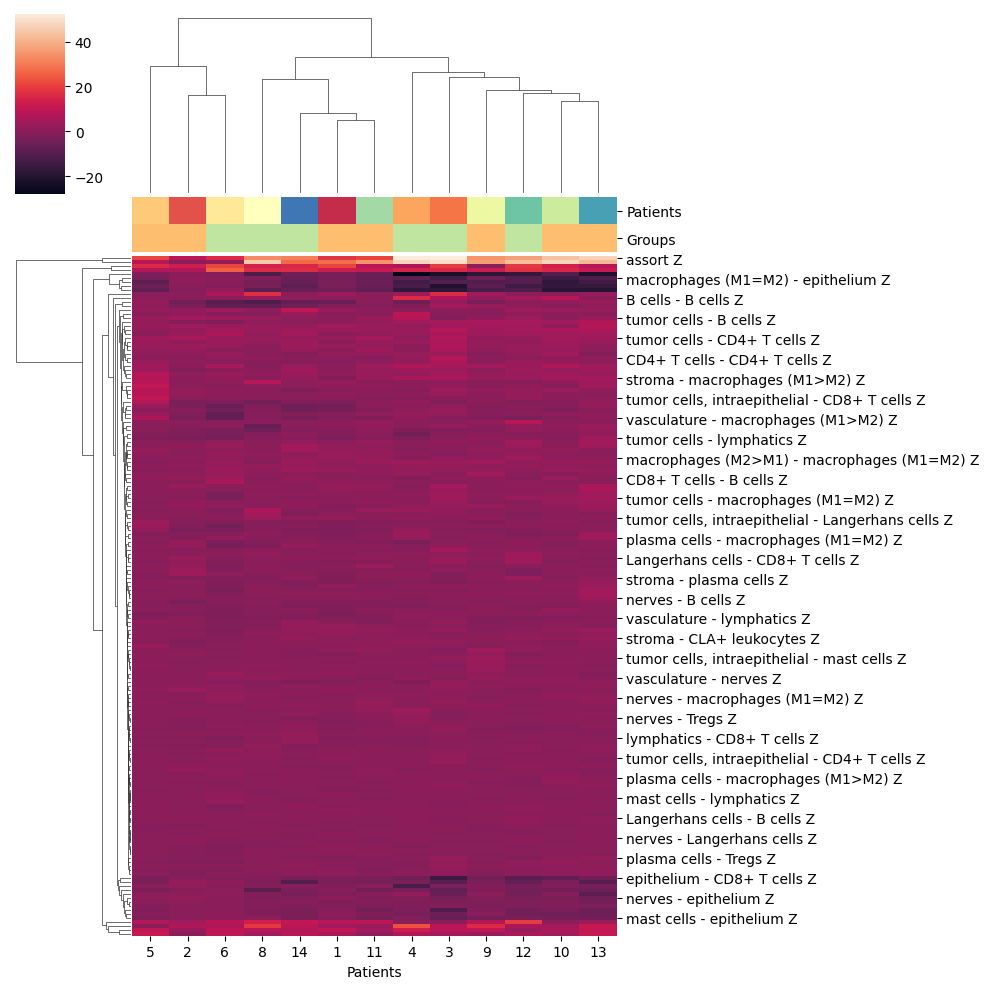

In [9]:

zscores_df = pandas.read_csv('~/Data/CODEX_CTCL/CODEX_z_net_stats_cleaned.csv')
zscores_df.index = zscores_df['Patients']
print(zscores_df.shape)

Annot = zscores_df.iloc[:,:2]
Annot.index = Annot['Patients']
row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(Annot)
zscores_df
display(zscores_df.iloc[:,1:])
seaborn.clustermap(zscores_df.iloc[:,1:].T, col_colors=row_colors)

(13, 14199)


,Patients,Groups
Patients,,
1,1,1
2,2,1
3,3,2
4,4,2
5,5,1
6,6,2
8,8,2
9,9,1
10,10,1


,Groups,assort Z,B cells - B cells Z,CD4+ T cells - B cells Z,CD4+ T cells - CD4+ T cells Z,CD8+ T cells - B cells Z,CD8+ T cells - CD4+ T cells Z,CD8+ T cells - CD8+ T cells Z,Langerhans cells - B cells Z,Langerhans cells - CD4+ T cells Z,...,nerves - CLA+ leukocytes Z / stroma - CLA+ leukocytes Z,nerves - CLA+ leukocytes Z / tumor cells - CLA+ leukocytes Z,"nerves - CLA+ leukocytes Z / tumor cells, intraepithelial - CLA+ leukocytes Z",nerves - CLA+ leukocytes Z / vasculature - CLA+ leukocytes Z,stroma - CLA+ leukocytes Z / tumor cells - CLA+ leukocytes Z,"stroma - CLA+ leukocytes Z / tumor cells, intraepithelial - CLA+ leukocytes Z",stroma - CLA+ leukocytes Z / vasculature - CLA+ leukocytes Z,"tumor cells - CLA+ leukocytes Z / tumor cells, intraepithelial - CLA+ leukocytes Z",tumor cells - CLA+ leukocytes Z / vasculature - CLA+ leukocytes Z,"tumor cells, intraepithelial - CLA+ leukocytes Z / vasculature - CLA+ leukocytes Z"
Patients,,,,,,,,,,,,,,,,,,,,,
1,1,18.285423,0.379628,1.013038,0.360985,-0.195251,2.297432,2.237812,0.331563,-0.850976,...,3.990451,0.587920,3.740170,-0.287372,0.147332,0.937280,-0.072015,6.361696,-0.488794,-0.076834
2,1,9.193553,-0.342746,-0.379896,-0.163383,1.571017,-0.333608,3.260047,0.458192,1.376494,...,0.676385,-0.618078,1.814761,1.508010,-0.913796,2.683031,2.229515,-2.936137,-2.439838,0.830969
3,2,52.271849,6.007915,-0.758091,7.467845,0.576871,-0.973770,6.804749,-0.677016,0.313157,...,-1.516482,3.024327,-0.328930,3.827157,-1.994304,0.216903,-2.523707,-0.108761,1.265458,-11.635184
4,2,52.205555,16.019297,0.404733,1.494855,-1.356062,0.812310,-0.058913,-0.098084,0.436204,...,0.190718,0.792708,0.723100,-0.207556,4.156448,3.791467,-1.088289,0.912189,-0.261831,-0.287036
5,1,20.961282,0.271940,0.584850,0.105791,1.229469,1.405370,2.606522,0.164320,0.001452,...,-3.264608,4.784982,1.435998,-0.722284,-1.465714,-0.439868,0.221247,0.300105,-0.150948,-0.502984
6,2,15.939660,0.365925,0.214144,1.127403,3.779232,2.073310,2.613420,0.376769,-0.205678,...,0.405144,1.352813,0.808950,0.232707,3.339094,1.996700,0.574381,0.597976,0.172017,0.287665
8,2,32.947097,1.881605,0.719742,0.885881,-0.573129,0.899784,0.197335,-0.262054,0.305551,...,2.966553,17.361745,2.438017,0.503556,5.852497,0.821835,0.169744,0.140425,0.029004,0.206543
9,1,34.551844,1.436217,2.658506,-0.373779,0.893049,0.533221,1.754543,-0.114010,-0.411717,...,-0.928777,-0.057884,0.396978,0.153294,0.062323,-0.427420,-0.165049,-6.858170,-2.648295,0.386152
10,1,43.370101,8.605185,-0.331394,1.186227,2.301700,0.354720,3.069966,-0.355190,0.457781,...,0.223316,-3.328945,1.219007,-2.110226,-14.906914,5.458675,-9.449525,-0.366184,0.633902,-1.731102


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


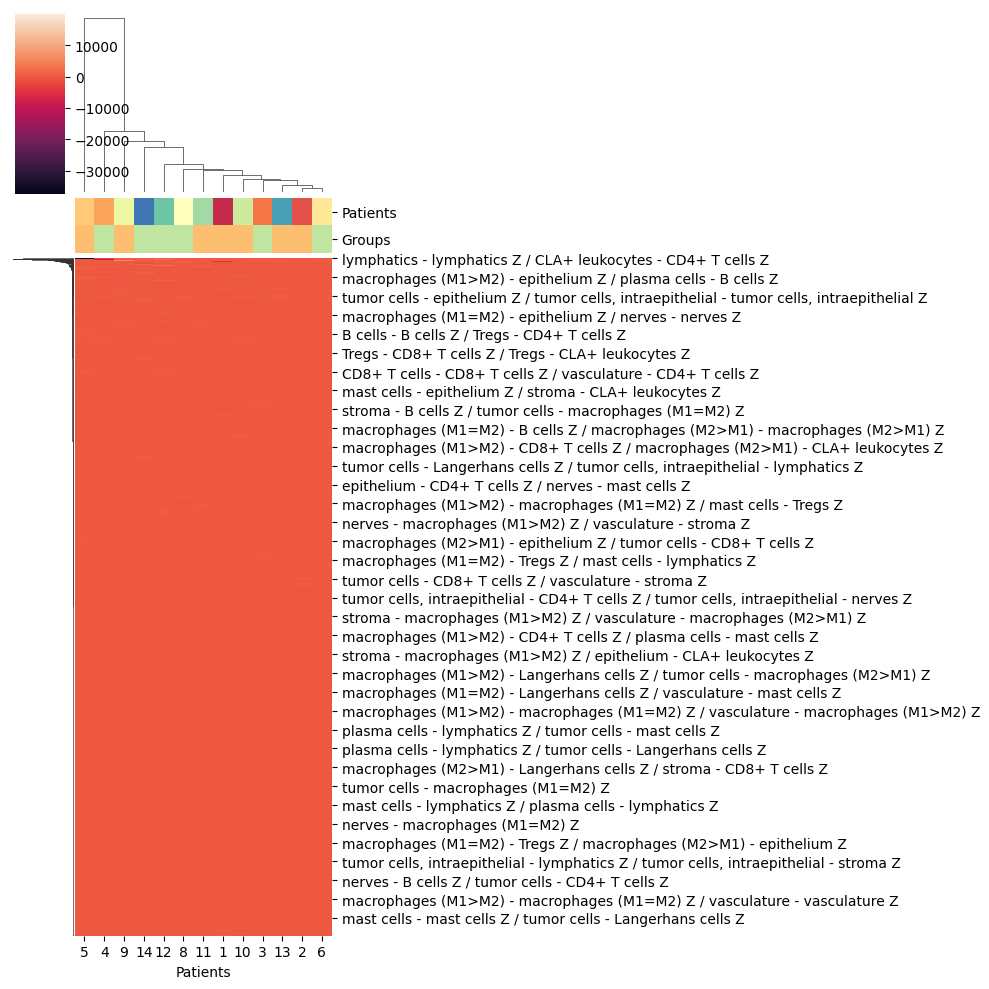

In [10]:

zscores_df = pandas.read_csv('~/Data/CODEX_CTCL/CODEX_z_net_stats_comp.csv')
zscores_df.index = zscores_df['Patients']
print(zscores_df.shape)

Annot = zscores_df.iloc[:,:2]
Annot.index = Annot['Patients']
row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(Annot)
zscores_df
display(zscores_df.iloc[:,1:])
seaborn.clustermap(zscores_df.iloc[:,1:].T, col_colors=row_colors)

### Mosna Niches

In [11]:
Niches = pandas.read_csv('../../../Data/CODEX_CTCL/MOSNA_CODEX-output.csv')

Col_oI = ['FileName','Patients','Groups','niche_annot']
mosna_niches_df = Niches[Col_oI]

mosna_niches = mosna_niches_df.loc[:,['FileName','niche_annot']]
mosna_niches_count = pandas.DataFrame(mosna_niches.value_counts().reset_index())
mosna_niches_count = mosna_niches_count.pivot_table(index='niche_annot', columns='FileName', values = 'count').fillna(0)
display(mosna_niches_count.sample())


FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
niche_annot,,,,,,,,,,,,,,,,,,,,,
2,60.0,196.0,1.0,83.0,160.0,112.0,184.0,426.0,130.0,45.0,...,188.0,220.0,253.0,84.0,312.0,122.0,284.0,675.0,114.0,189.0


,FileName,Patients
FileName,,
reg001,reg001,1
reg002,reg002,1
reg006,reg006,2
reg035,reg035,9
reg036,reg036,9
reg039,reg039,10
reg040,reg040,10
reg042,reg042,11
reg051,reg051,13


FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
niche_annot,,,,,,,,,,,,,,,,,,,,,
0,197.0,304.0,22.0,123.0,1001.0,924.0,729.0,412.0,356.0,303.0,...,312.0,365.0,182.0,58.0,425.0,196.0,180.0,182.0,159.0,399.0
1,415.0,844.0,32.0,91.0,281.0,169.0,90.0,91.0,10.0,10.0,...,268.0,309.0,227.0,84.0,391.0,159.0,131.0,196.0,333.0,478.0
2,60.0,196.0,1.0,83.0,160.0,112.0,184.0,426.0,130.0,45.0,...,188.0,220.0,253.0,84.0,312.0,122.0,284.0,675.0,114.0,189.0
3,102.0,159.0,17.0,36.0,429.0,347.0,301.0,215.0,26.0,17.0,...,81.0,163.0,259.0,65.0,300.0,115.0,268.0,272.0,47.0,232.0
4,322.0,546.0,33.0,89.0,133.0,69.0,81.0,66.0,5.0,9.0,...,129.0,144.0,103.0,31.0,263.0,127.0,60.0,124.0,387.0,397.0
5,136.0,217.0,7.0,72.0,167.0,247.0,108.0,20.0,25.0,4.0,...,211.0,29.0,74.0,60.0,62.0,68.0,111.0,165.0,84.0,106.0
6,49.0,55.0,0.0,109.0,163.0,101.0,147.0,38.0,6.0,70.0,...,36.0,87.0,7.0,3.0,30.0,21.0,48.0,93.0,16.0,12.0
7,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,26.0,41.0
8,0.0,0.0,0.0,0.0,0.0,0.0,125.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


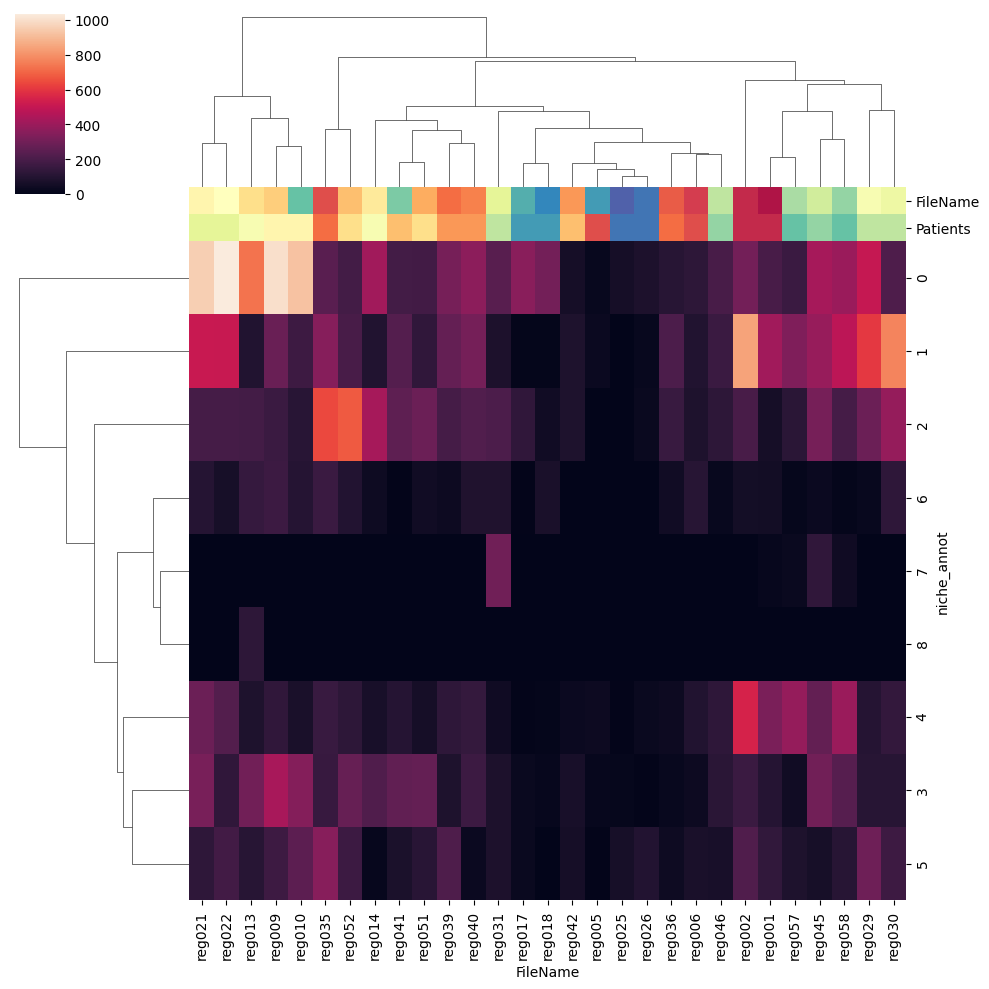

In [12]:
Annot = mosna_niches_df.iloc[:,:-2].drop_duplicates()
Annot.index = Annot['FileName']
row_colors = pandas.DataFrame(index=Annot.index)

for col in Annot.columns:
    unique_values = Annot[col].unique()
    palette = seaborn.color_palette("Spectral", len(unique_values))
    color_map = dict(zip(unique_values, palette))
    row_colors[col] = Annot[col].map(color_map)

display(Annot)
mosna_niches_count
display(mosna_niches_count)
seaborn.clustermap(mosna_niches_count, col_colors=row_colors)

In [13]:
mosna_niches_count.index = "MOSNA_Niche" + mosna_niches_count.index.astype(str)
mosna_niches_count.head()

FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
niche_annot,,,,,,,,,,,,,,,,,,,,,
MOSNA_Niche0,197.0,304.0,22.0,123.0,1001.0,924.0,729.0,412.0,356.0,303.0,...,312.0,365.0,182.0,58.0,425.0,196.0,180.0,182.0,159.0,399.0
MOSNA_Niche1,415.0,844.0,32.0,91.0,281.0,169.0,90.0,91.0,10.0,10.0,...,268.0,309.0,227.0,84.0,391.0,159.0,131.0,196.0,333.0,478.0
MOSNA_Niche2,60.0,196.0,1.0,83.0,160.0,112.0,184.0,426.0,130.0,45.0,...,188.0,220.0,253.0,84.0,312.0,122.0,284.0,675.0,114.0,189.0
MOSNA_Niche3,102.0,159.0,17.0,36.0,429.0,347.0,301.0,215.0,26.0,17.0,...,81.0,163.0,259.0,65.0,300.0,115.0,268.0,272.0,47.0,232.0
MOSNA_Niche4,322.0,546.0,33.0,89.0,133.0,69.0,81.0,66.0,5.0,9.0,...,129.0,144.0,103.0,31.0,263.0,127.0,60.0,124.0,387.0,397.0


In [14]:
prop = pandas.read_csv("../../../Data/CODEX_CTCL/CODEX_count_types_per_sample.csv",index_col=0).T

prop.index = "ABUND_" + prop.index.astype(str)
prop.head()

FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
ABUND_Groups,1,1,1,1,2,2,2,2,1,1,...,1,1,1,1,2,2,1,1,2,2
ABUND_B cells,23,11,0,6,2,0,153,25,0,0,...,4,3,0,2,10,6,2,3,7,7
ABUND_CD4+ T cells,16,34,0,3,109,99,15,5,0,0,...,8,6,10,0,33,16,20,18,25,18
ABUND_CD8+ T cells,107,122,0,5,114,72,28,17,1,0,...,41,32,20,2,71,36,11,5,77,27
ABUND_CLA+ leukocytes,12,8,0,3,4,10,0,0,0,0,...,0,0,0,0,4,1,2,5,3,4


### Composed data

In [15]:

comp = pandas.read_csv("../../../Data/CODEX_CTCL/CODEX_composed_variables.csv",index_col=0).T.fillna(0)

comp.index = "COMP_" + comp.index.astype(str)
comp.head()

FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
COMP_Groups,1.000000,1.000000,1.0,1.000000,2.000000,2.0,2.000000,2.000000,1.0,1.0,...,1.000000,1.000000,1.0,1.0,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
COMP_B cells / ( B cells + CD4+ T cells ),0.589744,0.244444,0.0,0.666667,0.018018,0.0,0.910714,0.833333,0.0,0.0,...,0.333333,0.333333,0.0,1.0,0.232558,0.272727,0.090909,0.142857,0.218750,0.280000
COMP_B cells / ( B cells + CD8+ T cells ),0.176923,0.082707,0.0,0.545455,0.017241,0.0,0.845304,0.595238,0.0,0.0,...,0.088889,0.085714,0.0,0.5,0.123457,0.142857,0.153846,0.375000,0.083333,0.205882
COMP_B cells / ( B cells + CLA+ leukocytes ),0.657143,0.578947,0.0,0.666667,0.333333,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,0.0,1.0,0.714286,0.857143,0.500000,0.375000,0.700000,0.636364
"COMP_B cells / ( B cells + DCs, CD11c+ )",1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000


### Z-scores

In [16]:

zscores = pandas.read_csv("../../../Data/CODEX_CTCL/CODEX_zscores.csv",index_col=0).T.fillna(0)

zscores.index = "zscores_" + zscores.index
zscores.columns = zscores.columns.str.split('-').str[-1]
zscores.head()

id,reg039,reg001,reg046,reg035,reg029,reg030,reg014,reg022,reg025,reg051,...,reg002,reg018,reg036,reg040,reg021,reg057,reg058,reg045,reg042,reg026
zscores_assort Z,39.367081,24.190942,23.398796,53.465659,37.519237,31.455295,46.301606,16.117764,12.633753,45.689836,...,12.379904,19.995641,15.638028,47.373121,15.761557,13.741738,47.697650,50.355990,8.247755,13.344075
zscores_B cells - B cells Z,17.367182,1.134907,6.026715,0.000000,-0.156813,5.865000,7.596524,-1.043565,0.000000,-0.089803,...,-0.375650,0.000000,0.000000,-0.156813,1.775415,2.459748,-0.278960,2.611957,-0.089803,0.000000
zscores_CD4+ T cells - B cells Z,-0.400815,-1.243968,-0.766431,5.500000,1.581339,0.774536,-0.754354,0.753801,0.000000,-0.480017,...,3.270044,0.000000,-0.182989,-0.261973,-0.325513,0.176978,-0.669385,-1.003352,0.000000,0.000000
zscores_CD4+ T cells - CD4+ T cells Z,2.633942,-0.678786,-0.870370,-0.533023,1.456763,1.350863,-0.214535,1.896369,0.000000,1.130731,...,1.400757,0.000000,-0.214535,-0.261488,0.358437,-1.196626,0.683198,1.138473,0.000000,0.000000
zscores_CD8+ T cells - B cells Z,3.840726,0.860589,-1.219096,-0.307967,-0.340693,-1.196877,-0.647140,4.081195,0.000000,-0.335480,...,-1.251090,0.000000,2.094064,0.762673,3.477269,1.022958,2.127269,-0.767088,-0.224544,0.000000


### Combine all data

In [55]:

import pandas as pd

df_combined = pd.concat([mosna_niches_count, stagate_count])
df_combined = pd.concat([df_combined, hmrf_count])
df_combined = pd.concat([df_combined, prop])
df_combined = pd.concat([df_combined, comp])
df_combined = pd.concat([df_combined, zscores])

df_combined = df_combined.dropna(axis=1)
# df_combined.dropna(axis=0)
df_combined = mosna_niches_count
df_combined.sample()


FileName,reg001,reg002,reg005,reg006,reg009,reg010,reg013,reg014,reg017,reg018,...,reg039,reg040,reg041,reg042,reg045,reg046,reg051,reg052,reg057,reg058
niche_annot,,,,,,,,,,,,,,,,,,,,,
MOSNA_Niche2,60.0,196.0,1.0,83.0,160.0,112.0,184.0,426.0,130.0,45.0,...,188.0,220.0,253.0,84.0,312.0,122.0,284.0,675.0,114.0,189.0


In [56]:
X = df_combined.T
X
clinical = pandas.read_csv('../../../Data/CODEX_CTCL/41467_2021_26974_MOESM3_ESM_-_Objects.csv',index_col=0).loc[:,['FileName','Groups','Patients']].reset_index()
Y = clinical[['FileName','Groups']].drop_duplicates()
Y.index = Y['FileName']
Y = Y['Groups']
idx = Y.index.isin(X.index)
Y = Y[idx]
Y.index.isin(X.index)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Machine learning model

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_with_features(X, Y, N_feat=30):
    # Setting up 5-fold stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Creating the Logistic Regression model
    model = LogisticRegression(random_state=42)
    
    # Performing cross-validation and computing the AUC scores for each fold
    cv_auc_scores = cross_val_score(model, X, Y, cv=cv, scoring='roc_auc')
    print(f"Cross-validated AUC scores: {cv_auc_scores}")
    print(f"Average AUC Score: {cv_auc_scores.mean()} ± {cv_auc_scores.std()}")

    # Splitting the dataset into training and testing sets for feature importance analysis
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    model.fit(X_train, Y_train)

    # Getting feature coefficients (importances)
    feature_importances = model.coef_[0]

    # Creating a DataFrame to view the feature importances more easily
    features_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Sorting the DataFrame based on feature importance and selecting the top N_feat
    sorted_features_df = features_df.sort_values(by='Importance', ascending=False).head(N_feat)

    # Plotting
    plt.figure(figsize=(10, 8))
    sorted_features_df['grp'] = sorted_features_df['Feature'].str[:4]
    sns.barplot(data=sorted_features_df, x='Importance', y='Feature', hue='Importance', color='red')
    plt.title('Top N_feat Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    return sorted_features_df


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Cross-validated AUC scores: [0.66666667 0.44444444 0.66666667 0.33333333 0.83333333]
Average AUC Score: 0.5888888888888889 ± 0.17777777777777773


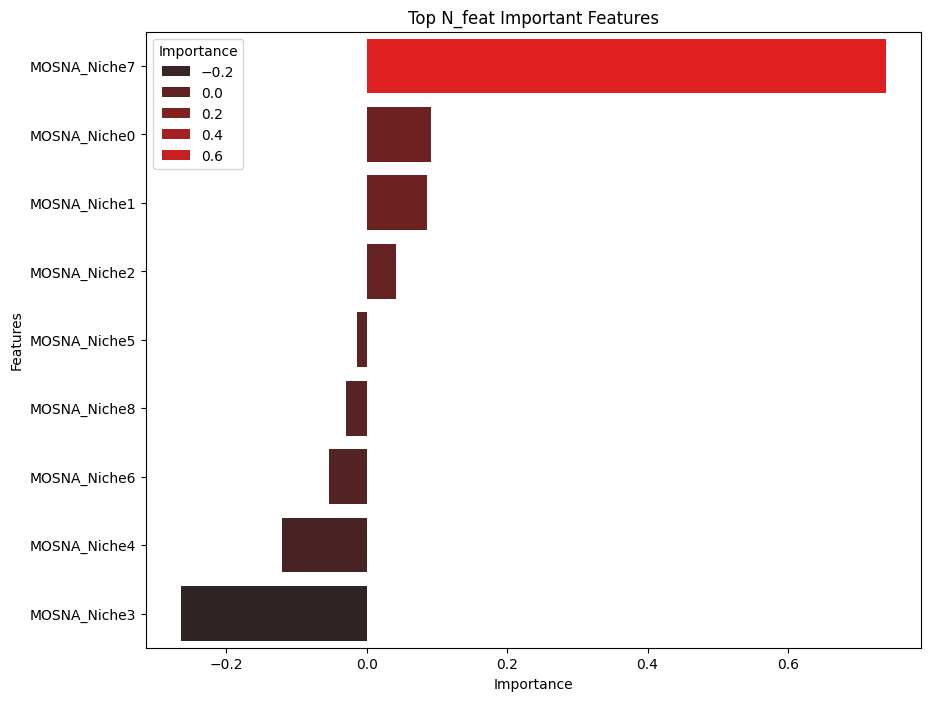

,Feature,Importance,grp
7,MOSNA_Niche7,0.739097,MOSN
0,MOSNA_Niche0,0.091569,MOSN
1,MOSNA_Niche1,0.085604,MOSN
2,MOSNA_Niche2,0.041837,MOSN
5,MOSNA_Niche5,-0.014312,MOSN
8,MOSNA_Niche8,-0.029625,MOSN
6,MOSNA_Niche6,-0.053842,MOSN
4,MOSNA_Niche4,-0.121381,MOSN
3,MOSNA_Niche3,-0.264768,MOSN


In [60]:
evaluate_model_with_features(X,Y)